In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

df = pd.DataFrame(X)

df.rename(columns={0: 'x', 1: 'y'}, inplace=True)

print(df)

    x   y
0   3   5
1   1   4
2   1   5
3   2   6
4   1   5
5   6   8
6   6   6
7   6   7
8   5   6
9   6   7
10  7   1
11  8   2
12  9   1
13  8   2
14  9   3
15  9   2
16  8   3
17  4   9
18  4  10
19  5   9
20  4  10


In [2]:
Scaler = StandardScaler()
df[['x_t', 'y_t']] = Scaler.fit_transform(df[['x', 'y']])

Test test

In [3]:
def optimize_kmeans(df, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(df)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    plt.plot(means, inertias)
    plt.show()

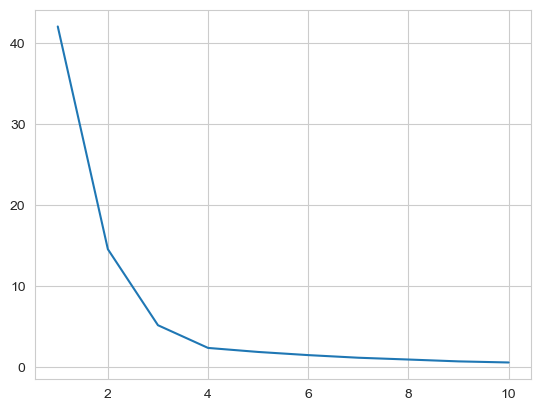

In [4]:
optimize_kmeans(df[['x_t', 'y_t']], 10)

In [5]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df[['x','y']])

df['label'] = kmeans.labels_

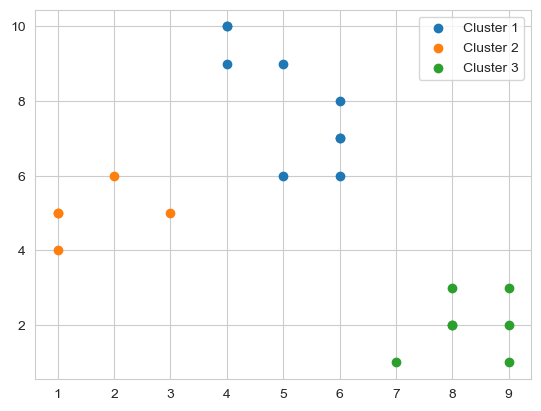

In [6]:
fig, ax = plt.subplots()

for i in range(3):
    df_plot = df.loc[df['label'] == i]
    ax.scatter(df_plot['x'], df_plot['y'])
    
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [7]:
x_new = float(input("Enter a value for x: "))
y_new = float(input("Enter a value for y: "))

# Predicting the cluster for the new point
new_point = np.array([[x_new, y_new]])
predicted_cluster = kmeans.predict(new_point)

print(f"The predicted cluster for the point ({x_new}, {y_new}) is: Cluster {predicted_cluster[0] + 1}")

The predicted cluster for the point (4.0, 4.0) is: Cluster 2
